In [1]:
#This is the beginning of my working, and I try to read one text for testing 
with open('./raw_corpus/NYT/NYT2025_01_27.txt', 'r', encoding='utf-8', errors='ignore') as f:
    text = f.read()
print(text[:500])

What to Know About DeepSeek and How It Is Upending A.I.
How did a little-known Chinese start-up cause the markets and U.S. tech giants to quake? Heres what to know.
A hand holding an iPhone with words saying Hi, Im DeepSeek and How can I help you today? on the screen.

Tech stocks tumbled. Giant companies like Meta and Nvidia faced a barrage of questions about their future. Tech executives took to social media to proclaim their fears.

And it was all because of a little-known Chinese artificial 


In [3]:
#starting work with spacy
#we will use spacy, so we import the library and also the English language model.

import spacy

nlp = spacy.load("en_core_web_sm")

In [4]:
#Read all text files inside the subfolders cnn, bbc, and nyt within the raw_corpus directory.
import os

folder_path = "./raw_corpus"  # Main folder containing subfolders (cnn, bbc, nyt)
all_text = ""  # Store all file contents

# Recursively walk through all subdirectories (cnn, bbc, nyt) and read text files
for root, _, files in os.walk(folder_path):
    for file_name in files:
        if file_name.endswith('.txt'):  # Check for text files
            file_path = os.path.join(root, file_name)  # Full path to file

            # Read the text file
            with open(file_path, "r", encoding="utf-8", errors="ignore") as file:
                    all_text += file.read() + "\n"
       

# Convert the entire text to lowercase after reading all files
all_text = all_text.lower()

print(all_text[:500])  # Print first 500 characters to verify


uk will not be able to resist china's tech dominance
china's success in technology has not come out of thin air, even given the unlikely origins of the deepseek deep shock.
the obscure hangzhou hedge fund that coded a chatgpt competitor as a side project it claims cost just $5.6m to train emerges from a concerted effort to invest in future generations of technology.
this is not an accident. this is policy.
the raw materials of artificial intelligence (ai) are microchips, science phds and data. o


In [5]:
# Next, we process text with spacy by calling the nlp()
# function, to be able to tokenize it and to filter our tokens of specific kind.

doc = nlp(all_text)

print(type(doc))

<class 'spacy.tokens.doc.Doc'>


In [6]:
# The nlp() pipeline tokenizes the text into a Spacy Doc object. This can be
# understood as a list of Spacy tokens. 
# We use .text attribute, because we want to get the string value of the token.

for token in doc[0:10]:
    print(token.text)

uk
will
not
be
able
to
resist
china
's
tech


In [7]:
#filtering with spaCy
#spaCy has marked the information about a token being a stopword or alphabetic as attributes attached to the tokens¶
#These attributes are .is_stop and .is_alpha.
#If the value of .is_stop is True, the token is a stopword according to Spacy.
#If the value of .is_alpha is True, the token is an alphabetic token (consists ONLY of alphabets)
# We filter alphabetic non-stopword tokens and other tokens into two lists.

list_nonstop = []
list_others = []

for token in doc:
    if token.is_stop == False and token.is_alpha == True:
        list_nonstop.append(token)
    else:
        list_others.append(token)

print(f"Some examples of 'nonstop' tokens that on our list: {list_nonstop[0:15]}")


# Reflection: What information do we miss here? How would the results change, if we selected only non-stopwords, or words that consist of alphabets.

Some examples of 'nonstop' tokens that on our list: [uk, able, resist, china, tech, dominance, china, success, technology, come, thin, air, given, unlikely, origins]


In [8]:
#Lemmatization: Convert words to their base form
lemmas = []
for token in list_nonstop:
    lemmas.append(token.lemma_)

# Print some lemmatized words
print(f"Some examples of lemmatized words: {lemmas[:15]}")

Some examples of lemmatized words: ['uk', 'able', 'resist', 'china', 'tech', 'dominance', 'china', 'success', 'technology', 'come', 'thin', 'air', 'give', 'unlikely', 'origin']



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


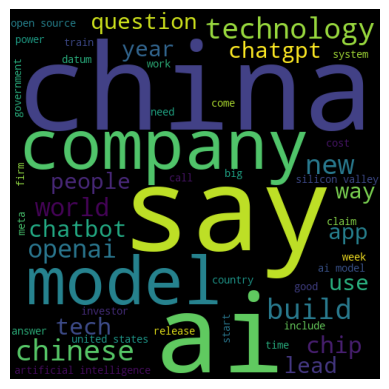

In [10]:
# We create a word cloud of our key terms. We could as well create a bar graph
# or create a table with frequencies.
# The image is saved to our folder, where we can have a more detailed look at it.

# For the visualization, we need to install the package wordcloud

!pip install wordcloud

words = " ".join(lemmas) # We join our list to a string to visualize it with WordCloud
words = words.replace("deepseek", "") # We remove the main keyword from our visualization.

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color="black",width=500,height=500, max_words=50).generate(words)
plt.imshow(wc)
plt.axis("off")
plt.savefig("./wordcloud.png", dpi = 200) # We save our visualization to the deepseek folder
plt.show()

I want to move away some meaningless words like"china""chinese""Deepseek""ai""say"

In [13]:
!pip install gensim pandas numpy nltk pyLDAvis   #gensim is a library for topic modelling


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [14]:
# Restore pre-processed texts
folder_path = "./preprocessed_corpus" 

# Save NYT corpus (pre-processed) to the folder
with open(folder_path + "nyt_corpus.txt", "w", encoding="utf-8") as f:

    f.write("".join(nyt_texts)) 

# Save BBC corpus (pre-processed) to the specified folder
with open(folder_path + "bbc_corpus.txt", "w", encoding="utf-8") as f:
    f.write("".join(bbc_texts))

# Save CNN corpus (pre-processed) to the specified folder
with open(folder_path + "cnn_corpus.txt", "w", encoding="utf-8") as f:
    f.write("".join(cnn_texts))


NameError: name 'nyt_texts' is not defined

In [ ]:
!pip install gensim

The nltk (Natural Language Toolkit) module is a powerful Python library used for natural language processing (NLP) tasks. It provides tools for working with human language data, such as text tokenization, lemmatization, stemming, parsing, and more.

Key Features of nltk:
Tokenization – Splitting text into words or sentences.
Stopwords Removal – Removing common words like "the", "is", "and".
Stemming & Lemmatization – Reducing words to their base or root form.
Part-of-Speech (POS) Tagging – Identifying nouns, verbs, adjectives, etc.
Named Entity Recognition (NER) – Identifying names, places, dates, etc.
WordNet Interface – Synonyms, antonyms, and word relationships.
Text Classification & Sentiment Analysis – Categorizing text into predefined labels.


In [ ]:
import nltk  # Import the nltk module

nltk.download('wordnet')  

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from gensim.utils import simple_preprocess

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()


In [ ]:
#This code is part of the text preprocessing pipeline, where for preparing text data for further NLP tasks, such as topic modeling.

from nltk.stem import WordNetLemmatizer #This tool will help convert words to their base or dictionary form (e.g., "running" becomes "run").
from gensim.utils import simple_preprocess
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))#Provides a list of common English stopwords (e.g., "the," "is," "in").
lemmatizer = WordNetLemmatizer()

# Add irrelevant words to stop_words #after run the first time, acording to the results,
additional_stopwords = {"said", "u", "company", "deepseeks", "tech","say","china","chinese"}
stop_words = set(stopwords.words('english')).union(additional_stopwords)


def preprocess(text):
    tokens = word_tokenize(text.lower())  # Tokenizes a sentence into individual words,converts all text to lowercase, ensuring consistency
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation/numbers
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return tokens

df['tokens'] = df['text'].apply(preprocess)
print(df['tokens'].head())  # Check tokenized output


In [ ]:
# Add irrelevant words to stop_words
additional_stopwords = {"said", "u", "company", "deepseeks", "tech","say","china","chinese"}
stop_words = set(stopwords.words('english')).union(additional_stopwords)

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation/numbers
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return tokens


In [ ]:
from gensim.corpora import Dictionary
from gensim.models import LdaModel
from gensim.models.coherencemodel import CoherenceModel

# Create a dictionary and a corpus from the tokenized data
dictionary = Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Print the dictionary and corpus to check if everything looks fine
print(dictionary.token2id)  # Check word-to-ID mapping
print(corpus[:2])  # Check corpus (list of word counts per document)


In [ ]:
# Train the LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=30)

# Print the topics
topics = lda_model.print_topics(num_words=5)  # Print the top 5 words for each topic
for topic in topics:
    print(topic)


In [ ]:
coherence_model = CoherenceModel(model=lda_model, corpus=corpus, coherence='u_mass', dictionary=dictionary)
coherence_score = coherence_model.get_coherence()
print(f"Coherence Score (u_mass): {coherence_score}")


In [ ]:
# Calculate coherence score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df['tokens'], dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print(f'Coherence Score: {coherence_lda}')


In [ ]:
#I want to remove the word deepseek ,ai,china,since they are meaningless, what do you think? I acuually expect topic like "tech""politic""economy"words like "deepseek," "ai," and "china" may dominate the topics and make them overly specific to certain aspects of your dataset, especially if they don't align with the broader themes you're aiming for, like tech, politics, and economy.
#If you're looking to obtain more general topics like tech, politics, and economy, removing these highly frequent and specific words can definitely help the model focus on more meaningful, diverse, and interpretable topics.
#Modify the Preprocessing to Exclude Specific Words:
#To ensure words like "deepseek," "ai," and "china" are excluded from the topics, you can add them to a custom stopwords list and remove them during the preprocessing stage.
custom_stopwords = stop_words.union({"deepseek", "ai", "china", "chinese", "openai"})

def preprocess(text):
    tokens = word_tokenize(text.lower())  # Convert to lowercase and tokenize
    tokens = [word for word in tokens if word.isalpha()]  # Remove punctuation/numbers
    tokens = [word for word in tokens if word not in custom_stopwords]  # Remove custom stopwords
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatization
    return tokens


Once you've modified the preprocessing function to exclude the custom stopwords, you can reprocess your text and fit the LDA model again. This will remove the impact of those frequent words that might have skewed the topics.

In [ ]:
# Reprocess the text after adding the custom stopwords
df['tokens'] = df['text'].apply(preprocess)

# Recreate the dictionary and corpus
dictionary = Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Train the LDA model again
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=30)


In [26]:
for topic in lda_model.print_topics(num_words=10):
    print(topic)

NameError: name 'lda_model' is not defined

In [ ]:
custom_stopwords = stop_words.union({"deepseek", "ai", "china", "chinese", "openai", "u", "model", "said", "app"})


In [ ]:
# Reprocess the text with updated stopwords
df['tokens'] = df['text'].apply(preprocess)

# Recreate the dictionary and corpus
dictionary = Dictionary(df['tokens'])
corpus = [dictionary.doc2bow(text) for text in df['tokens']]

# Train the LDA model again
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)


In [ ]:
from gensim.models import LdaModel

# Create the LDA model with 3 topics
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=30)

# Print the top 10 words for each topic
for idx, topic in lda_model.print_topics(num_words=10):
    print(f"Topic {idx}: {topic}")


In [31]:
!pip install pyLDAvis



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [32]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

# Visualize the topics
lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


ModuleNotFoundError: No module named 'pyLDAvis'

In [34]:
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


ModuleNotFoundError: No module named 'pyLDAvis'